In [80]:
import numpy as np
import nltk

In [81]:
df_review=[line.rstrip() for line in open('amazon_alexa.tsv')]
print(len(df_review))

3151


In [82]:
import pandas
df_review=pandas.read_csv('amazon_alexa.tsv',sep='\t')
df_review.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [83]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

**Basic Exploratory Data Analysis**

In [84]:
df_review.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Making a new column to detect how long the text message are:

In [85]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
df_review['length'] = df_review['verified_reviews'].fillna('').apply(len)
df_review.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [88]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
 5   length            3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


In [92]:
df_review.dropna(inplace=True)

**Converting text into Vectors**

In [93]:
#1,2,3->negative(i.e 0)
df_review.loc[df_review['feedback']<3,'feedback'] = 0

#4,5->positive(i.e 1)
df_review.loc[df_review['feedback']>=3,'feedback'] = 1

In [94]:
stp_words=stopwords.words('english')
def clean_review(verified_reviews):
    cleanreview=" ".join(word for word in verified_reviews.
                        split() if word not in stp_words)
    return cleanreview

df_review['verified_reviews']=df_review['verified_reviews'].apply(clean_review)

In [96]:
df_review.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love Echo!,0,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,0,9
2,4,31-Jul-18,Walnut Finish,"Sometimes playing game, answer question correc...",0,195
3,5,31-Jul-18,Charcoal Fabric,"I lot fun thing. My 4 yr old learns dinosaurs,...",0,172
4,5,31-Jul-18,Charcoal Fabric,Music,0,5


In [97]:
df_review['feedback'].value_counts()

feedback
0    3149
Name: count, dtype: int64

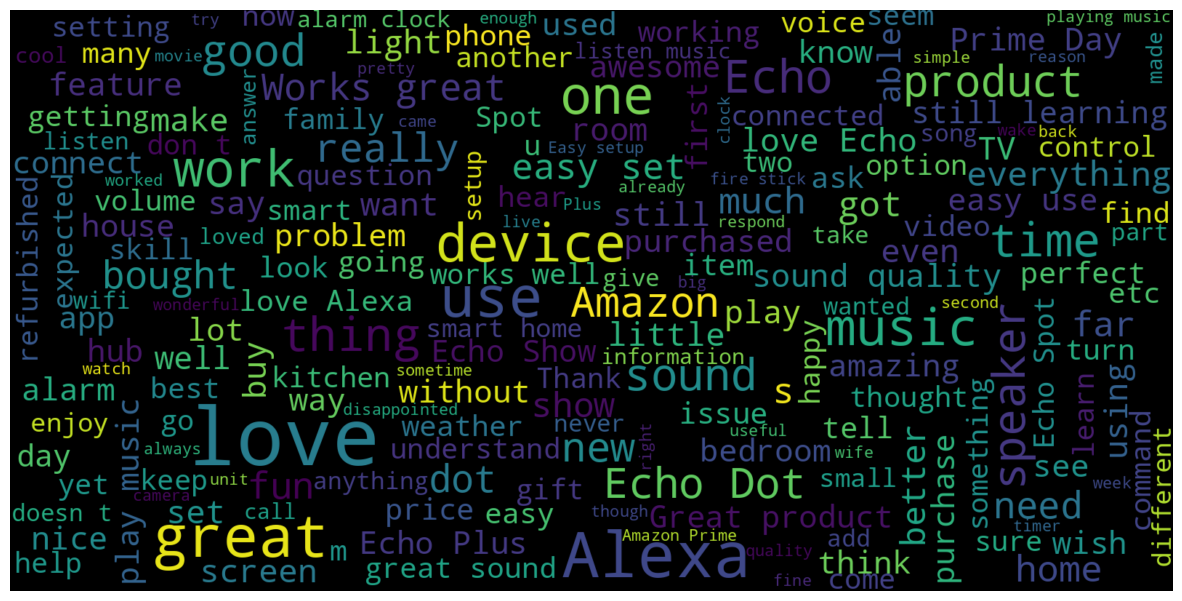

In [98]:
consolidated=' '.join(word for word in df_review['verified_reviews'][df_review['feedback']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
# Check the number of reviews with feedback == 1
print(len(df_review[df_review['feedback']==1]))

# Print a few cleaned reviews to see if they are empty
for review in df_review['verified_reviews'][df_review['feedback']==1][:5]:
    print(review)

0


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

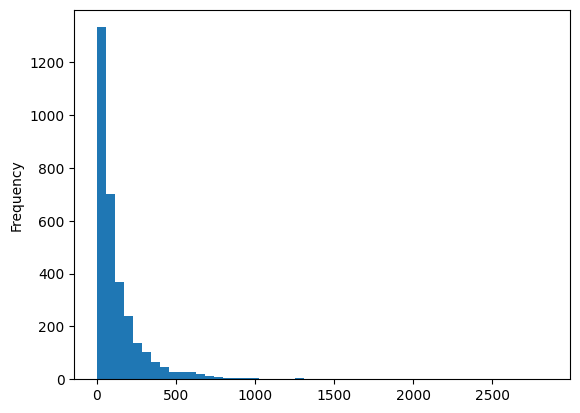

In [101]:
df_review['length'].plot(bins=50, kind='hist')

Finding out the Maximum length  review

In [102]:
df_review.length.describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [103]:
df_review[df_review['length']== 2851]['verified_reviews'].iloc[0]

"Incredible piece technology.I right center living room island kitchen counter. The mic speaker goes every direction quality sound quite good. I connected Echo via Bluetooth Sony soundbar TV find Echo placement 360 sound appealing. It's audiophile equipment good range decent bass. The sound adequate indoor entertaining loud enough bother neighbors building. The knob top works great adjusting volume. This first Echo device I would imagine press volume buttons (on Echo 2) large inconvenience precise. For alone I would recommend regular Echo (2nd generation).The piece looks quality quite sturdy weight it. The rubber material bottom good grip granite counter-- cat even rub scent without tipping over.This order came free Philips Hue Bulb I installed along extra one I bought. I put 2 bulbs living room floor lamp, turned light, I say &#34;Alexa, connect devices&#34;. The default names bulb assigned &#34;First light&#34; &#34;Second light&#34;, I dimmer floor lamp I turned on/off one lights sa

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
dataset=pd.read_csv('amazon_alexa.tsv',delimiter ='\t', quoting=3)

In [106]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Cleaning the dataset**

In [107]:
#Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corprus=[]
for i in range(0,3150):
  # Ensure the review is a string before applying re.sub
  review = str(dataset['verified_reviews'][i])
  review=re.sub('[a-zA-Z]',' ',review)
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corprus.append(review)

In [108]:
#creating the Bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corprus).toarray()
y=dataset.iloc[:,4].values

In [109]:
#splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [110]:
#Fitting Random forest classifier with 100 trees to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [111]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [112]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

In [113]:
cm

array([[  0,  54],
       [  0, 576]])

In [114]:
accuracy_score(y_test,y_pred)

0.9142857142857143

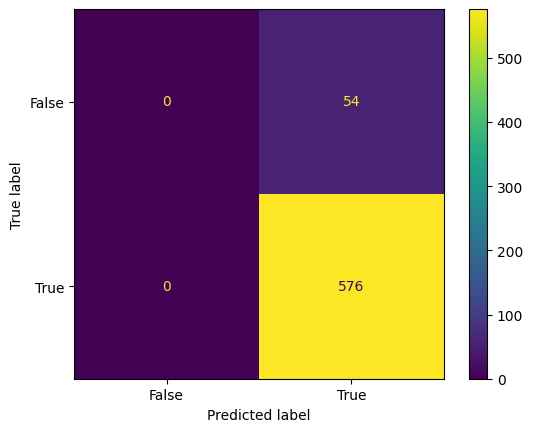

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and y_pred (predicted labels) from your model
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()